## Reproduce Fig. 3c
Average activation of natural vs. de novo design stability prediction shows significant co-activation.

In [1]:
import os
import pandas as pd
import sys
import os
from subprocess import call

sys.path.append('../../')
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import common.validation_tools
from IPython.display import display, HTML
import numpy as np

import random
from scipy.stats import ttest_1samp
from sklearn.externals import joblib
from matplotlib.lines import Line2D

from common import plot_style_utils

random.seed(42)
np.random.seed(42)

In [2]:
plot_style_utils.set_pub_plot_context(colors='categorical', context="poster")

In [3]:
palette = sns.color_palette()

In [4]:

s_dict = {'engineered':['EEHEE_rd3_0037.pdb_ssm2_stability',
       'EEHEE_rd3_1498.pdb_ssm2_stability',
       'EEHEE_rd3_1702.pdb_ssm2_stability',
       'EEHEE_rd3_1716.pdb_ssm2_stability',
       'EHEE_0882.pdb_ssm2_stability', 'EHEE_rd2_0005.pdb_ssm2_stability',
       'EHEE_rd3_0015.pdb_ssm2_stability',
       'HEEH_rd2_0779.pdb_ssm2_stability',
       'HEEH_rd3_0223.pdb_ssm2_stability',
       'HEEH_rd3_0726.pdb_ssm2_stability',
       'HEEH_rd3_0872.pdb_ssm2_stability', 'HHH_0142.pdb_ssm2_stability',
       'HHH_rd2_0134.pdb_ssm2_stability',
       'HHH_rd3_0138.pdb_ssm2_stability'],
         'natural':['Pin1_ssm2_stability',
       'hYAP65_ssm2_stability', 'villin_ssm2_stability']}

In [5]:
colors = {
    'engineered':'grey',
    'natural':'blue'
}

coef_d = {}

for n in ['engineered', 'natural']:
    coeffs = []
    for s in s_dict[n]:
        model = joblib.load(f"../../data/rocklin_ssm2__{s}__avg_hidden__model.pkl")
        coeffs.append(model.coef_)
    coeffs = np.array(coeffs)
    coef_d[n] = coeffs.mean(axis=0)

/media/sandias42/ExDrive/Software/Python/Anaconda/envs/prepcustom/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LassoLarsCV from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/media/sandias42/ExDrive/Software/Python/Anaconda/envs/prepcustom/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LassoLarsCV from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/media/sandias42/ExDrive/Software/Python/Anaconda/envs/prepcustom/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LassoLarsCV from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/media/sandias42/ExDrive/Software/Python/Anaconda/envs/prepcustom/lib/python3.6/si

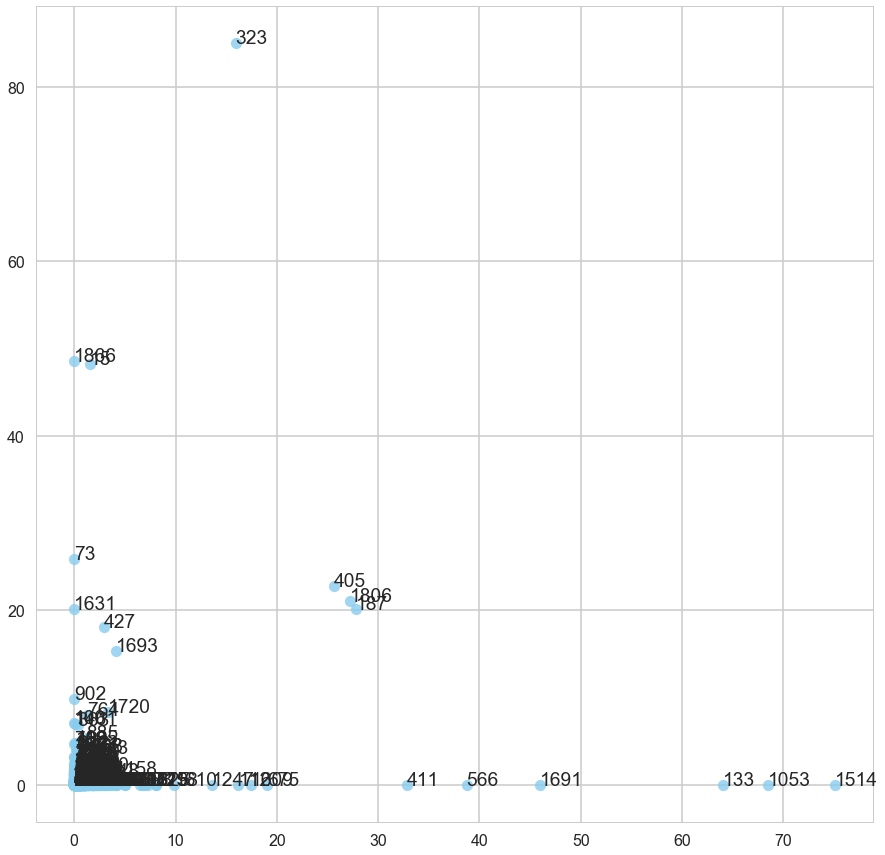

In [6]:
plt.figure(figsize=(15,15))
sns.regplot(x=np.abs(coef_d['engineered']), y=np.abs(coef_d['natural']), fit_reg=False)
for line in np.arange(coef_d['engineered'].shape[0]):
    plt.text(np.abs(coef_d['engineered'])[line], np.abs(coef_d['natural'])[line], line)
    


In [7]:
x=np.abs(coef_d['engineered'])
y=np.abs(coef_d['natural'])

In [8]:
np.dot(x,y)

3375.5482785117974

In [9]:
res_coactivation_counts = []

si = 10000

for i in range(si):
    y_n = np.random.permutation(y)
    x_n = np.random.permutation(x)

    res_coactivation_counts.append(np.dot(x_n,y_n))

In [10]:
print('p =',(pd.Series(res_coactivation_counts) > np.dot(x,y)).value_counts().loc[True] / si)

p = 0.0056


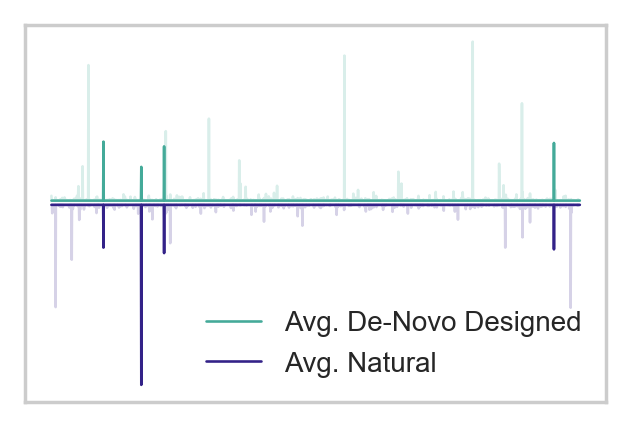

In [11]:
plot_style_utils.set_pub_plot_context(context="paper")
fig = plt.figure(figsize=(3,2), dpi=250)
lw =.75
ax = fig.add_subplot(111)
ax.plot(x, alpha=0.2, color=palette[6], linewidth=lw)
ax.plot(-y-2, alpha=0.2, color=palette[4], linewidth=lw)

full_neurons = np.abs(x*y) > np.mean(np.abs(x*y)) + 2* np.std(np.abs(x*y))

x_coact_only = np.zeros(x.shape)
x_coact_only[full_neurons] = x[full_neurons]

y_coact_only = np.zeros(y.shape)
y_coact_only[full_neurons] = y[full_neurons]

ax.plot(x_coact_only, label='Avg. De-Novo Designed', color=palette[6], linewidth=lw)
ax.plot(-y_coact_only-2, label='Avg. Natural', color=palette[4], linewidth=lw)


plt.yticks([])
plt.xticks([])

ax.legend()
plot_style_utils.save_for_pub(fig=fig, path='./img/c')

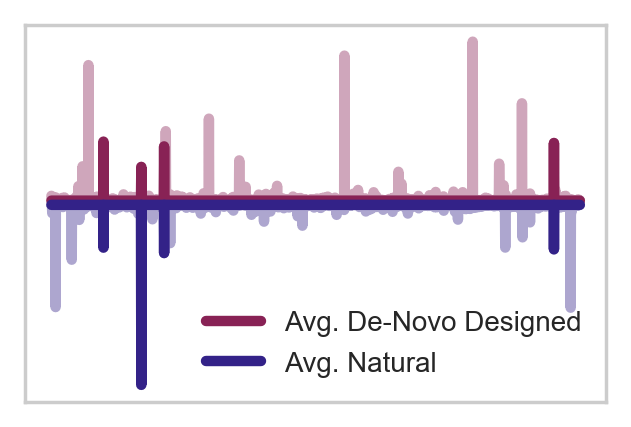

In [12]:
plot_style_utils.set_pub_plot_context(context="paper")
fig = plt.figure(figsize=(3,2), dpi=250)
lw =3
ax = fig.add_subplot(111)
ax.plot(x, alpha=0.4, color=palette[8], linewidth=lw)
ax.plot(-y-2, alpha=0.4, color=palette[4], linewidth=lw)

full_neurons = np.abs(x*y) > np.mean(np.abs(x*y)) + 2* np.std(np.abs(x*y))

x_coact_only = np.zeros(x.shape)
x_coact_only[full_neurons] = x[full_neurons]

y_coact_only = np.zeros(y.shape)
y_coact_only[full_neurons] = y[full_neurons]

ax.plot(x_coact_only, label='Avg. De-Novo Designed', color=palette[8], linewidth=lw)
ax.plot(-y_coact_only-2, label='Avg. Natural', color=palette[4], linewidth=lw)


plt.yticks([])
plt.xticks([])

ax.legend()